In [1]:
using LinearAlgebra
using Plots
using Pkg 
#Pkg.add("Random")
using Random

El Hamiltoniano que se nos plantea en el caso para $N = 3$ qubits es

$H = A_1 \cos(\theta) + A_2 \sin(\theta)$

donde $A_1$ y $A_2$ son operadores aleatorios, en el paper se realizó lo siguiente 

- Choose different eigenstates $\ket{\varphi_n}$ and plot their expectations on $A_1$ and $A_2$ 
- Plot the energy of $H$ with respect to the eigenstates $\ket{\varphi_n}$ as a function of $\theta$, for $n=0,...,7$


In [36]:
N = 3 # number of qubits
d = 2^N # dimension of the Hilbert space
#A1 = rand(d,d) #+ im*randn(d,d)
#A2 = rand(d,d) #+ im*randn(d,d)

sigmax = [0 1; 1 0]
sigmay = [0 -im; im 0]
sigmaz = [1 0; 0 -1]
id= I(2)

pauli_ops = [sigmax, sigmay, sigmaz]
random_pauli = pauli_ops[rand(1:3)]
pauli_ops2 = shuffle(pauli_ops)
random_pauli2 = pauli_ops2[rand(1:3)] 
A1 = kron(random_pauli, random_pauli, id) # Para una cadena el primer qubit interactúa con el segundo y el segundo con el tercero 
A2 = kron(id, random_pauli2, random_pauli2)


8×8 Matrix{Complex{Int64}}:
  0+0im  0+0im  0+0im  -1+0im   0+0im  0+0im  0+0im   0+0im
  0+0im  0+0im  1+0im   0+0im   0+0im  0+0im  0+0im   0+0im
  0+0im  1+0im  0+0im   0+0im   0+0im  0+0im  0+0im   0+0im
 -1+0im  0+0im  0+0im   0+0im   0+0im  0+0im  0+0im   0+0im
  0+0im  0+0im  0+0im   0+0im   0+0im  0+0im  0+0im  -1+0im
  0+0im  0+0im  0+0im   0+0im   0+0im  0+0im  1+0im   0+0im
  0+0im  0+0im  0+0im   0+0im   0+0im  1+0im  0+0im   0+0im
  0+0im  0+0im  0+0im   0+0im  -1+0im  0+0im  0+0im   0+0im

In [37]:
A11 = deepcopy(A1)
A22 = deepcopy(A2)

8×8 Matrix{Complex{Int64}}:
  0+0im  0+0im  0+0im  -1+0im   0+0im  0+0im  0+0im   0+0im
  0+0im  0+0im  1+0im   0+0im   0+0im  0+0im  0+0im   0+0im
  0+0im  1+0im  0+0im   0+0im   0+0im  0+0im  0+0im   0+0im
 -1+0im  0+0im  0+0im   0+0im   0+0im  0+0im  0+0im   0+0im
  0+0im  0+0im  0+0im   0+0im   0+0im  0+0im  0+0im  -1+0im
  0+0im  0+0im  0+0im   0+0im   0+0im  0+0im  1+0im   0+0im
  0+0im  0+0im  0+0im   0+0im   0+0im  1+0im  0+0im   0+0im
  0+0im  0+0im  0+0im   0+0im  -1+0im  0+0im  0+0im   0+0im

In [38]:
x = 0.5
H = A1.*cos(x) + A2.*sin(x)	
eigvec = eigen(H).vectors
eigenvecadj = adjoint(eigvec) # Matriz adjunta de eigenvectores Duda: ¿los vectores bras de este Hamiltoniano son los vectores adjuntos? 
function expectationvalue(eigvec,eigenvecadj)
    expvalueA1 = zeros(ComplexF64, d,d)
    expvalueA2 = zeros(ComplexF64, d,d)
    for i in 1:d 
        vecadji = transpose(eigenvecadj[i,:])
        for j in 1:d
            veci = eigvec[:,i]
            expvalueA1[i,j] = vecadji*A1*veci
            expvalueA2[i,j] = vecadji*A2*veci
        end
    end
    return expvalueA1, expvalueA2
end
A11, A22

(Complex{Int64}[0 + 0im 0 + 0im … -1 + 0im 0 + 0im; 0 + 0im 0 + 0im … 0 + 0im -1 + 0im; … ; -1 + 0im 0 + 0im … 0 + 0im 0 + 0im; 0 + 0im -1 + 0im … 0 + 0im 0 + 0im], Complex{Int64}[0 + 0im 0 + 0im … 0 + 0im 0 + 0im; 0 + 0im 0 + 0im … 0 + 0im 0 + 0im; … ; 0 + 0im 0 + 0im … 0 + 0im 0 + 0im; 0 + 0im 0 + 0im … 0 + 0im 0 + 0im])

In [39]:
function a1vsa2(xin,step,xfin, n) #n = 1 es el estado fundamental y n = 2 es el primer estado excitado, etc
    x = xin:step:xfin
    a1 = zeros(ComplexF64,length(x))
    a2 = zeros(ComplexF64,length(x))
    for i in 1:length(x)
        H = A11.*cos(x[i]) + A22.*sin(x[i])
        eigvec = eigen(H).vectors
        eigenvecadj = adjoint(eigvec) 
        rho = kron(eigvec[n,:],transpose(eigenvecadj[:,n])) # Matriz de densidad para el estado fundamental
        a1[i] = tr(rho*A11)
        a2[i] = tr(rho*A22)
    end
    return a1,a2
end

a1vsa2 (generic function with 1 method)

In [40]:
H1 = eigen(H).vectors
H1adj = adjoint(H1)

rho = H1[1,:]*transpose(H1adj[:,1])



8×8 Matrix{ComplexF64}:
  0.25+0.0im  0.0+0.0im  0.0+0.0im  …   0.25+0.0im  -0.25-0.0im  0.0+0.0im
   0.0+0.0im  0.0+0.0im  0.0+0.0im       0.0+0.0im    0.0-0.0im  0.0+0.0im
   0.0+0.0im  0.0+0.0im  0.0+0.0im       0.0+0.0im    0.0-0.0im  0.0+0.0im
  0.25+0.0im  0.0+0.0im  0.0+0.0im      0.25+0.0im  -0.25-0.0im  0.0+0.0im
   0.0+0.0im  0.0+0.0im  0.0+0.0im       0.0+0.0im    0.0-0.0im  0.0+0.0im
  0.25+0.0im  0.0+0.0im  0.0+0.0im  …   0.25+0.0im  -0.25-0.0im  0.0+0.0im
 -0.25+0.0im  0.0+0.0im  0.0+0.0im     -0.25+0.0im   0.25+0.0im  0.0+0.0im
   0.0+0.0im  0.0+0.0im  0.0+0.0im       0.0+0.0im    0.0-0.0im  0.0+0.0im

In [50]:
alpha = a1vsa2(0,0.001,2*pi,1)
beta = a1vsa2(0,0.001,2*pi,2)
gamma = a1vsa2(0,0.001,2*pi,3)
#plot(imag(alpha[1]),imag(alpha[2]))

(ComplexF64[0.0 + 0.0im, -0.5000000000000725 + 0.0im, 0.0 + 0.0im, 4.440892098500475e-16 + 0.0im, -3.222422328974517e-14 + 0.0im, 0.49999999999999856 + 0.0im, -0.9999999999999958 + 0.0im, 4.274358644806853e-15 + 0.0im, -0.500000000000005 + 0.0im, 0.500000000000017 + 0.0im  …  0.0 + 0.0im, 0.5000000000000148 + 0.0im, 0.0 + 0.0im, 0.5000000000000244 + 0.0im, 1.3877787807814457e-14 + 0.0im, -0.49999999999997746 + 0.0im, 0.0 + 0.0im, -7.982503547054876e-14 + 0.0im, 0.0 + 0.0im, 0.9999999999999997 + 0.0im], ComplexF64[0.0 + 0.0im, -0.4999999999999998 + 0.0im, 0.0 + 0.0im, -4.440892098500641e-16 + 0.0im, 0.0 + 0.0im, 0.500000000000013 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -0.49999999999999994 + 0.0im, 0.49999999999999994 + 0.0im  …  0.0 + 0.0im, -0.5000000000000042 + 0.0im, 0.0 + 0.0im, -0.49999999999999994 + 0.0im, 0.0 + 0.0im, 0.4999999999999682 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im])

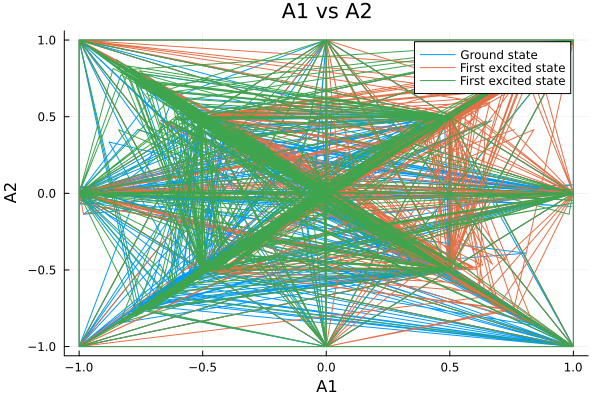

In [51]:
plot(real(alpha[1]),real(alpha[2]),xlabel = "A1", ylabel = "A2", label = "Ground state", title = "A1 vs A2")
plot!(real(beta[1]),real(beta[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")
plot!(real(gamma[1]),real(gamma[2]),xlabel = "A1", ylabel = "A2", label = "First excited state", title = "A1 vs A2")

In [43]:
function energyvsparameter(xmin,step,xmax)
    x = xmin:step:xmax
    energy = zeros(ComplexF64,d,length(x))
    for i in 1:length(x)
        H = A11.*cos(x[i]) + A22.*sin(x[i])
        energy[:,i] = eigen(H).values
    end
    return energy
end

energyvsparameter (generic function with 1 method)

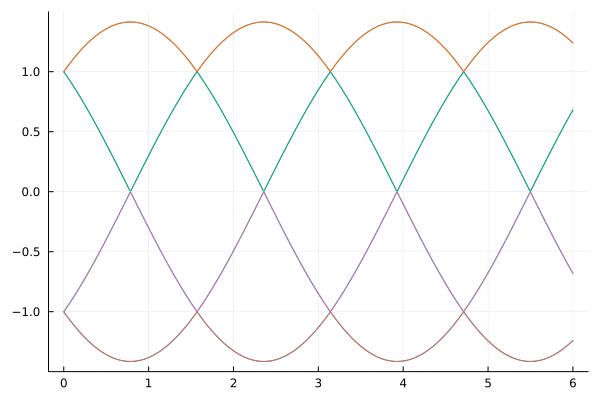

In [49]:
b = real(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,b', label = false)

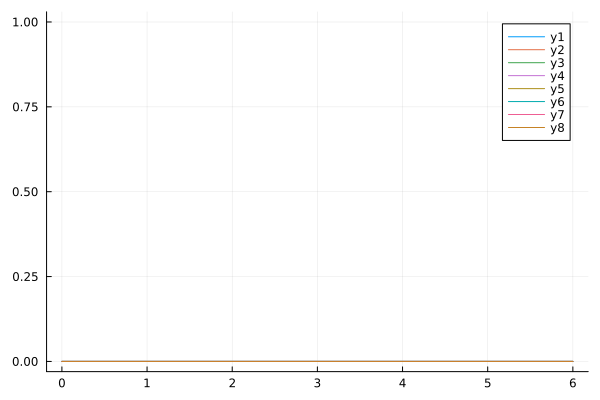

In [44]:
a = imag(energyvsparameter(0,0.01,6))
x = 0:0.01:6
plot(x,a')

In [46]:
ket_n = eigvec[:,1]
bra_n = adjoint(ket_n)

1×8 adjoint(::Vector{ComplexF64}) with eltype ComplexF64:
 0.5-0.0im  -5.55112e-17-0.0im  …  -0.5-0.0im  0.5-0.0im  0.0-0.0im

In [47]:
ket_n*bra_n

8×8 Matrix{ComplexF64}:
         0.25+0.0im  -2.77556e-17-0.0im  …          0.25+0.0im  0.0+0.0im
 -2.77556e-17+0.0im   3.08149e-33+0.0im     -2.77556e-17+0.0im  0.0+0.0im
          0.0+0.0im           0.0-0.0im              0.0+0.0im  0.0+0.0im
         0.25+0.0im  -2.77556e-17-0.0im             0.25+0.0im  0.0+0.0im
  1.38778e-17+0.0im  -1.54074e-33-0.0im      1.38778e-17+0.0im  0.0+0.0im
        -0.25+0.0im   2.77556e-17+0.0im  …         -0.25+0.0im  0.0+0.0im
         0.25+0.0im  -2.77556e-17-0.0im             0.25+0.0im  0.0+0.0im
          0.0+0.0im           0.0-0.0im              0.0+0.0im  0.0+0.0im

In [48]:
kron(ket_n,bra_n)

8×8 Matrix{ComplexF64}:
         0.25+0.0im  -2.77556e-17-0.0im  …          0.25+0.0im  0.0+0.0im
 -2.77556e-17+0.0im   3.08149e-33+0.0im     -2.77556e-17+0.0im  0.0+0.0im
          0.0+0.0im           0.0-0.0im              0.0+0.0im  0.0+0.0im
         0.25+0.0im  -2.77556e-17-0.0im             0.25+0.0im  0.0+0.0im
  1.38778e-17+0.0im  -1.54074e-33-0.0im      1.38778e-17+0.0im  0.0+0.0im
        -0.25+0.0im   2.77556e-17+0.0im  …         -0.25+0.0im  0.0+0.0im
         0.25+0.0im  -2.77556e-17-0.0im             0.25+0.0im  0.0+0.0im
          0.0+0.0im           0.0-0.0im              0.0+0.0im  0.0+0.0im